Decision Tree Accuracy Score: 78.86%
Decision Tree ROC AUC Score: 70.31%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Random Forest Accuracy Score: 74.80%
Random Forest ROC AUC Score: 67.18%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123


SVM Accuracy Score: 78.86%
SVM ROC AUC Score: 70.31%
SVM Classification Report:
              precision    recall  f1-score 

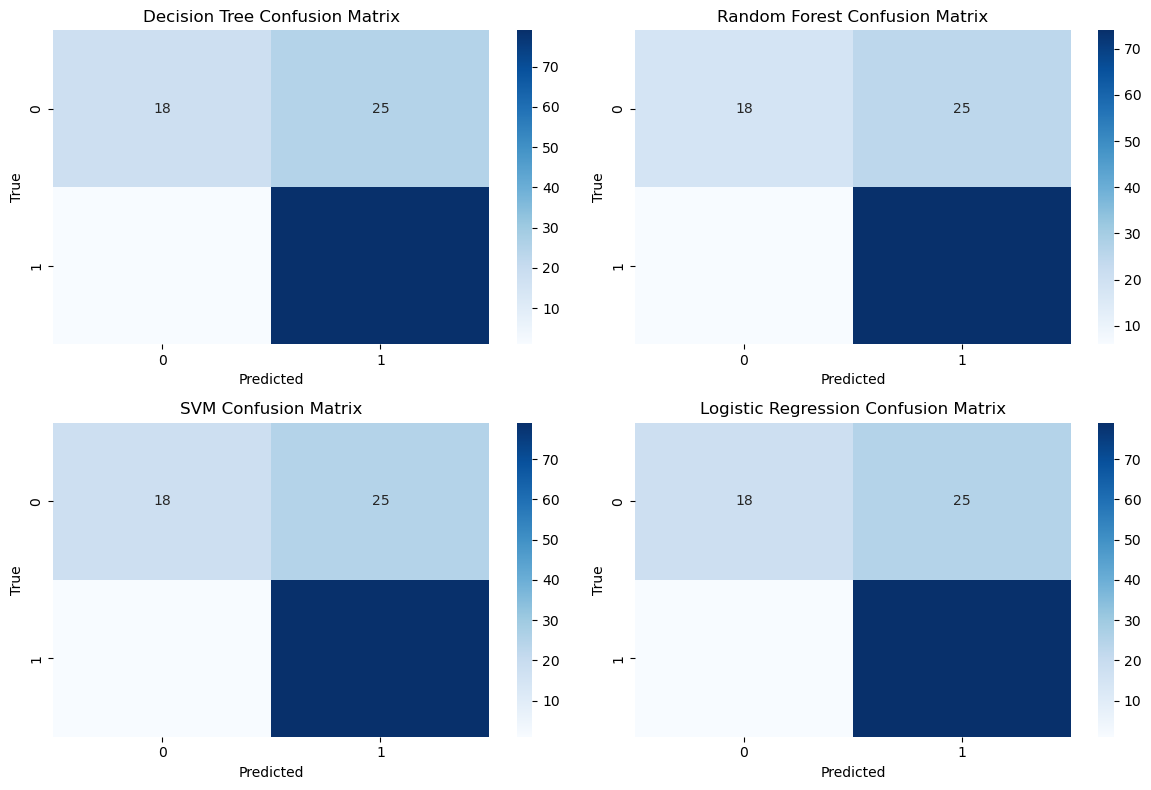

Decision Tree Prediction: 1
Random Forest Prediction: 1
SVM Prediction: 1
Logistic Regression Prediction: 1


C:\Users\ASUS\anaconda3\install\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\loan_data.csv")
df.drop(['Loan_ID'], axis=1, inplace=True)

# Handling missing values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Married'] = df['Married'].fillna(df['Married'].mode().iloc[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0]).astype(int)
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0]).astype(int)

# Encoding categorical variables
label_enc = LabelEncoder()
cat_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
               'Property_Area', 'Loan_Status']
for col in cat_columns:
    df[col] = label_enc.fit_transform(df[col])

# Split dataset
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, min_samples_leaf=35),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate models
results = {}
plt.figure(figsize=(12, 8))
for idx, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)
    results[name] = (accuracy, roc_score)

    plt.subplot(2, 2, idx)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    print(f'{name} Accuracy Score: {accuracy*100:.2f}%')
    print(f'{name} ROC AUC Score: {roc_score*100:.2f}%')
    print(f'{name} Classification Report:\n{classification_report(y_test, y_pred)}\n')

plt.tight_layout()
plt.show()

# Predict using user input
user_input = [[0, 1, 1, 0, 0, 4000, 1500, 128, 360, 1, 2]]
scaled_input = scaler.transform(user_input)
dt_prediction = models["Decision Tree"].predict(scaled_input)
rf_prediction = models["Random Forest"].predict(scaled_input)
svm_prediction = models["SVM"].predict(scaled_input)
lr_prediction = models["Logistic Regression"].predict(scaled_input)

print(f'Decision Tree Prediction: {dt_prediction[0]}')
print(f'Random Forest Prediction: {rf_prediction[0]}')
print(f'SVM Prediction: {svm_prediction[0]}')
print(f'Logistic Regression Prediction: {lr_prediction[0]}')
